## Geofile Visualizations

### Loading in shapefiles

In [3]:
import pandas as pd
import numpy as np

import os
cwd = os.getcwd()
cwd

'/Users/sophiamlawer/ML_project/CAPP-30254-Covid-Variants/notebooks'

In [4]:
import geopandas as gpd

def read_in(geo):
    shapefile = gpd.read_file(geo)
    return shapefile

il_geo = read_in("../Boundaries/IL_BNDY_County/IL_BNDY_County_Py.shp")
print("done")
mo_geo = read_in("../Boundaries/MO_2018_County_Boundaries-shp/MO_2018_County_Boundaries.shp")
print("done")
oh_geo = read_in("../Boundaries/ODOT_County_Boundaries/ODOT_County_Boundaries.shp")


done
done


### Clean IL

In [5]:
il_geo.columns = ["county", "fips", "geometry"]
il_geo["fips"] = il_geo["fips"].astype(str)
il_geo["fips"] = il_geo["fips"].str.pad(width=3, side='left', fillchar='0')
il_geo["fips"] = "17" + il_geo["fips"]
il_geo.drop("county", axis=1, inplace=True)
il_geo

,fips,geometry
0,17111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,17007,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
2,17141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,17197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,17099,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...
97,17081,"POLYGON ((-89.14445 38.47386, -89.12638 38.473..."
98,17101,"POLYGON ((-87.90805 38.85012, -87.88944 38.849..."
99,17121,"POLYGON ((-89.13843 38.73632, -89.13827 38.750..."
100,17181,"POLYGON ((-89.04143 37.59649, -89.04143 37.596..."


### Ohio

In [6]:
oh_geo_clean = oh_geo[["FIPS_COUNT", "geometry"]]
oh_geo_clean.columns = ["fips", "geometry"]
oh_geo_clean

,fips,geometry
0,39071,"POLYGON ((-83.78330 39.26382, -83.78312 39.263..."
1,39073,"POLYGON ((-82.49595 39.60265, -82.49505 39.612..."
2,39075,"POLYGON ((-81.87727 40.66713, -81.87564 40.667..."
3,39077,"POLYGON ((-82.83547 41.14407, -82.83549 41.145..."
4,39049,"POLYGON ((-83.24596 39.96574, -83.24595 39.965..."
...,...,...
83,39163,"POLYGON ((-82.51710 39.36942, -82.51595 39.379..."
84,39165,"POLYGON ((-83.98859 39.44441, -83.98941 39.435..."
85,39067,"POLYGON ((-81.27273 40.36923, -81.27271 40.369..."
86,39129,"POLYGON ((-82.84304 39.56150, -82.84164 39.561..."


### Missouri

In [7]:
mo_geo = mo_geo[["COUNTYFIPS", "geometry"]]
mo_geo.columns = ["fips", "geometry"]
mo_geo["fips"] = "29" + mo_geo["fips"]
mo_geo

,fips,geometry
0,29045,"POLYGON ((-91.72917 40.61371, -91.72120 40.603..."
1,29005,"POLYGON ((-95.20235 40.57847, -95.20239 40.566..."
2,29199,"POLYGON ((-91.94509 40.47537, -91.94526 40.460..."
3,29197,"POLYGON ((-92.35069 40.59327, -92.35076 40.578..."
4,29147,"POLYGON ((-94.60088 40.31487, -94.60131 40.300..."
...,...,...
110,29119,"POLYGON ((-94.07704 36.50209, -94.07703 36.498..."
111,29069,"POLYGON ((-89.95952 36.62857, -89.96002 36.628..."
112,29155,"POLYGON ((-89.67368 36.40043, -89.67240 36.400..."
113,29127,"POLYGON ((-91.73454 39.65748, -91.75336 39.657..."


In [8]:
df = il_geo.append(mo_geo).append(oh_geo_clean)
#df["fips"] = df["fips"].astype(int)
df

,fips,geometry
0,17111,"POLYGON ((-88.70742 42.49351, -88.68809 42.493..."
1,17007,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
2,17141,"POLYGON ((-89.68808 42.19949, -89.66846 42.200..."
3,17197,"POLYGON ((-88.26146 41.72439, -88.26146 41.724..."
4,17099,"POLYGON ((-88.93885 41.62836, -88.93871 41.628..."
...,...,...
83,39163,"POLYGON ((-82.51710 39.36942, -82.51595 39.379..."
84,39165,"POLYGON ((-83.98859 39.44441, -83.98941 39.435..."
85,39067,"POLYGON ((-81.27273 40.36923, -81.27271 40.369..."
86,39129,"POLYGON ((-82.84304 39.56150, -82.84164 39.561..."


In [9]:
df.to_csv('../Data/geofiles.csv', index = False)

### Link with Main File

Looking at the general outline of the states with no data attached:

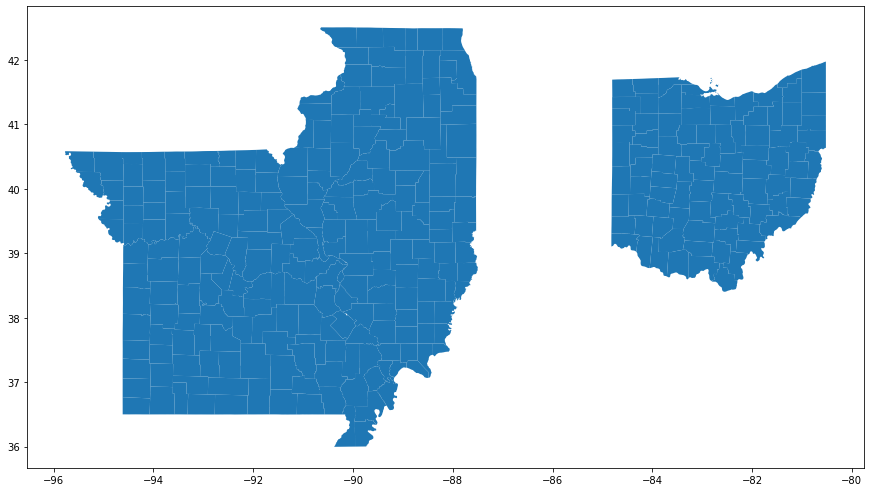

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
df.plot(ax=ax)

plt.show()

Merge in the full data:

In [11]:
merged = pd.read_csv("../Data/merged.csv", parse_dates=["date"], dtype={'fips': str})
print(merged.shape, df.shape)
full = merged.merge(df, on="fips", how="inner")
full.head()

(128854, 88) (305, 2)


,state,fips,county,date,cumulative_cases,cumulative_deaths,new_cases,new_deaths,new_cases_7avg,new_deaths_7avg,...,retail_rec,grocery_pharm,parks,transit,workplace,residential,new doses,cumulative doses,cases_next_week,geometry
0,IL,17001,Adams,2020-03-20,1.0,0.0,1.0,0.0,1.0,0.0,...,-33.0,11.0,NaN,-7.0,-22.0,13.0,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
1,IL,17001,Adams,2020-03-21,1.0,0.0,0.0,0.0,0.0,0.0,...,-55.0,-14.0,NaN,-30.0,-15.0,NaN,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
2,IL,17001,Adams,2020-03-22,1.0,0.0,0.0,0.0,0.0,0.0,...,-63.0,-42.0,NaN,NaN,-25.0,NaN,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
3,IL,17001,Adams,2020-03-23,1.0,0.0,0.0,0.0,0.0,0.0,...,-49.0,-20.0,NaN,-21.0,-29.0,14.0,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
4,IL,17001,Adams,2020-03-24,1.0,0.0,0.0,0.0,0.0,0.0,...,-46.0,-20.0,NaN,NaN,-31.0,15.0,0.0,0.0,0.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."


### See geo-distribution of important features

In [12]:
full.columns

Index(['state', 'fips', 'county', 'date', 'cumulative_cases',
       'cumulative_deaths', 'new_cases', 'new_deaths', 'new_cases_7avg',
       'new_deaths_7avg', '2weeksago_cases_7avg', '2weeksago_deaths_7avg',
       'total_pop', 'male', 'perc_male', 'female', 'perc_female', 'age_15_19',
       'p_age_15_19', 'age_20_24', 'p_age_20_24', 'age_25_34', 'p_age_25_34',
       'age_35_44', 'p_age_35_44', 'age_45_54', 'p_age_45_54', 'age_55_59',
       'p_age_55_59', 'age_60_64', 'p_age_60_64', 'age_median', 'age_62over',
       'p_age_62over', 'age_65over', 'p_age_65over', 'white', 'p_white',
       'black', 'p_black', 'native', 'p_native', 'asian', 'p_asian',
       'hawaiian', 'p_hawaiian', 'other_race', 'p_other_race', 'hispanic',
       'p_hispanic', 'housing_units', 'below_50_pov', 'below_125_pov',
       'below_150_pov', 'below_185_pov', 'below_200_pov', 'below_300_pov',
       'below_400_pov', 'below_500_pov', 'below_pov', 'male_below_pov',
       'female_below_pov', 'age_under14', 'p

Number of Cases at US Peak (January 8, 2021)

<ipython-input-13-1bb28831f844>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map1["cases_per_pop"] = map1['new_cases_7avg']/map1["total_pop"]


Text(0.5, 1.0, 'Cases on Jan 8,2021 by County')

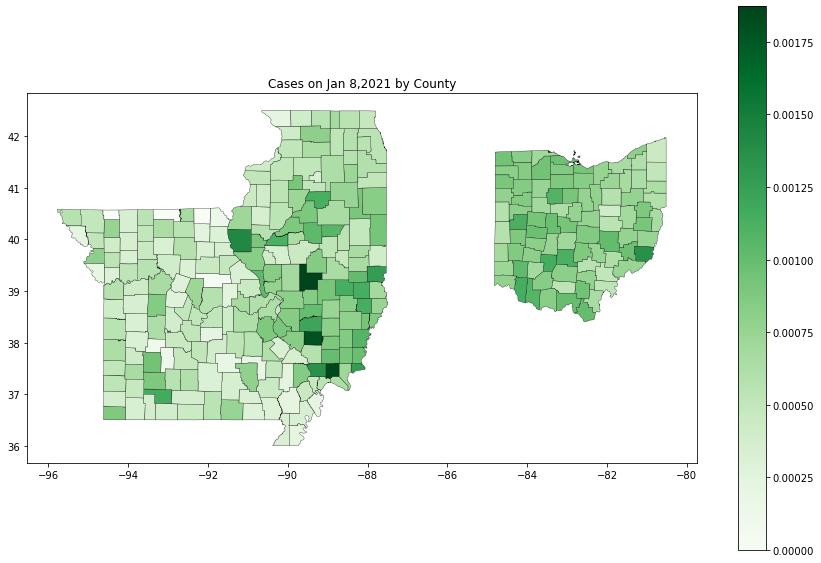

In [13]:
import datetime 

map1 = full[full["date"] == "01/08/2021"]
map1["cases_per_pop"] = map1['new_cases_7avg']/map1["total_pop"]
map1 = map1[['cases_per_pop', "fips", "geometry"]]
#map1
map1 = gpd.GeoDataFrame(map1)

fig,ax = plt.subplots(figsize=(15,10))
map1.plot(ax=ax,
           column= 'cases_per_pop',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Greens")
plt.title("Cases on Jan 8,2021 by County")

Movement in Retail and Recreation on January 8, 2021

Text(0.5, 1.0, 'Retail and Recreation Mobility on Jan 8,2021 by County with Light Blue to Signify Missing')

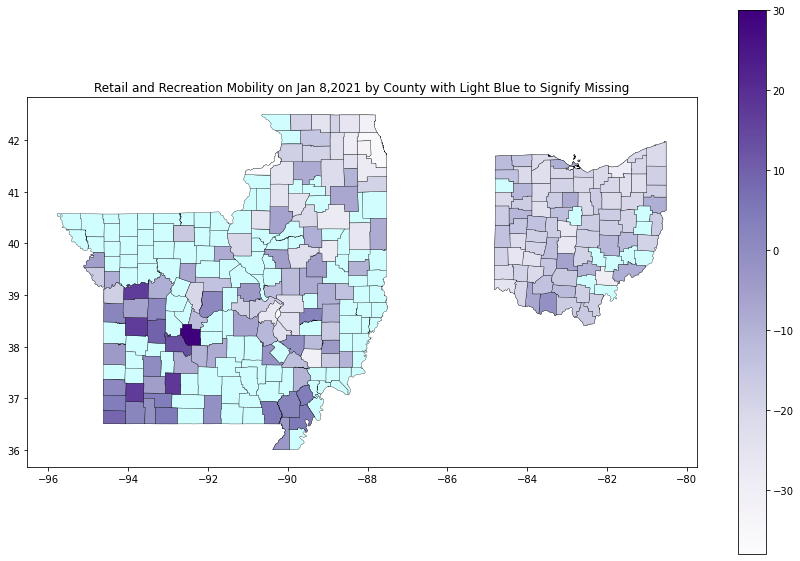

In [14]:
map3 = full[full["date"] == "01/08/2021"]
#map3["retail_rec"] = map3['new_cases_7avg']
map3 = map3[['retail_rec', "fips", "geometry"]]

map3 = gpd.GeoDataFrame(map3)

fig,ax = plt.subplots(figsize=(15,10))
out_map = df.plot(ax=ax,
                color='#d0fefe',
                legend=True,
                edgecolor='black',
                linewidth=0.3)

outmap = map3.plot(ax=ax,
           column= 'retail_rec',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Purples")
plt.title("Retail and Recreation Mobility on Jan 8,2021 by County with Light Blue to Signify Missing")

Percent of Population Hospitalized on the Peak Jan 8, 2021

<ipython-input-15-fe6e99507d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map5["hosp_per_pop"] = map5['total_adult_hospitalizations']/map5["total_pop"]


Text(0.5, 1.0, 'Cumulative Cases on January 8, 2021 by County')

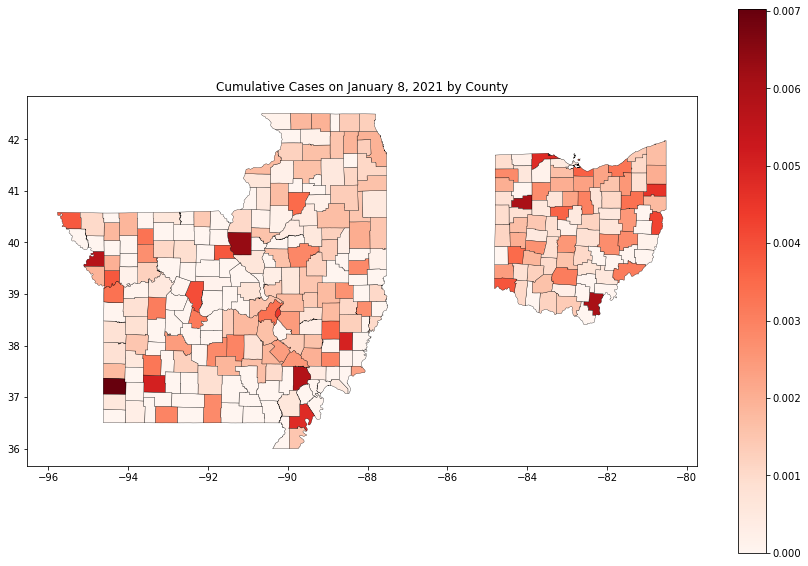

In [15]:
map5 = full[full["date"] == "01/08/2021"]
map5["hosp_per_pop"] = map5['total_adult_hospitalizations']/map5["total_pop"]
map5 = map5[['hosp_per_pop', "fips", "geometry"]]
#map1
map5 = gpd.GeoDataFrame(map5)

fig,ax = plt.subplots(figsize=(15,10))
map5.plot(ax=ax,
           column= 'hosp_per_pop',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Reds")
plt.title("Cumulative Cases on January 8, 2021 by County")

Cumulative Doses on Last Day in Data - May 27, 2021

<ipython-input-16-a8cc181d23dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map6["cumulative_doses_per_pop"] = map6['cumulative doses']/map6["total_pop"]


Text(0.5, 1.0, 'Cumulative Cases Per Total Population on May 27, 2021 by County')

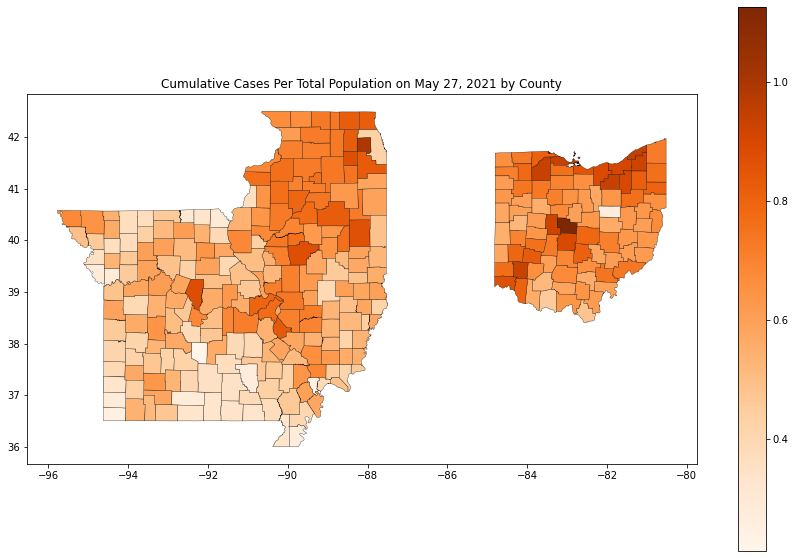

In [16]:
#cumulative doses
map6 = full[full["date"] == "05/20/2021"]
map6["cumulative_doses_per_pop"] = map6['cumulative doses']/map6["total_pop"]
map6 = map6[['cumulative_doses_per_pop', "fips", "geometry"]]
#map1
map6 = gpd.GeoDataFrame(map6)

fig,ax = plt.subplots(figsize=(15,10))
map6.plot(ax=ax,
           column= 'cumulative_doses_per_pop',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Oranges")
plt.title("Cumulative Cases Per Total Population on May 27, 2021 by County")

Cumulative Cases on Last Day in Data - May 27, 2021

<ipython-input-17-59b450e059c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map4["cumulative_deaths_per_pop"] = map4['cumulative_deaths']/map4["total_pop"]


Text(0.5, 1.0, 'Cumulative Deaths per Total Population on May 27, 2021 by County')

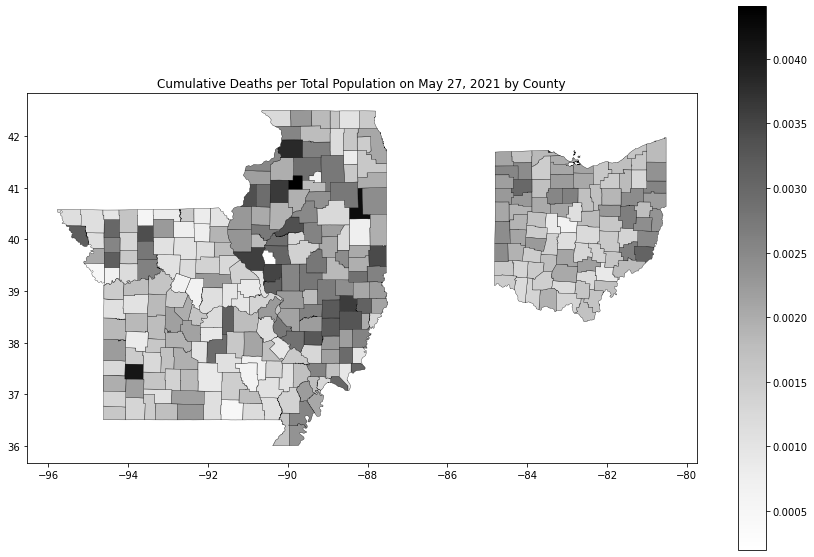

In [17]:
map4 = full[full["date"] == "05/27/2021"]
map4["cumulative_deaths_per_pop"] = map4['cumulative_deaths']/map4["total_pop"]
map4 = map4[['cumulative_deaths_per_pop', "fips", "geometry"]]
#map1
map4 = gpd.GeoDataFrame(map4)

fig,ax = plt.subplots(figsize=(15,10))
map4.plot(ax=ax,
           column= 'cumulative_deaths_per_pop',
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Greys")
plt.title("Cumulative Deaths per Total Population on May 27, 2021 by County")

Percent of Residents Over 65

Text(0.5, 1.0, 'Percent Over Age 65 by Fips')

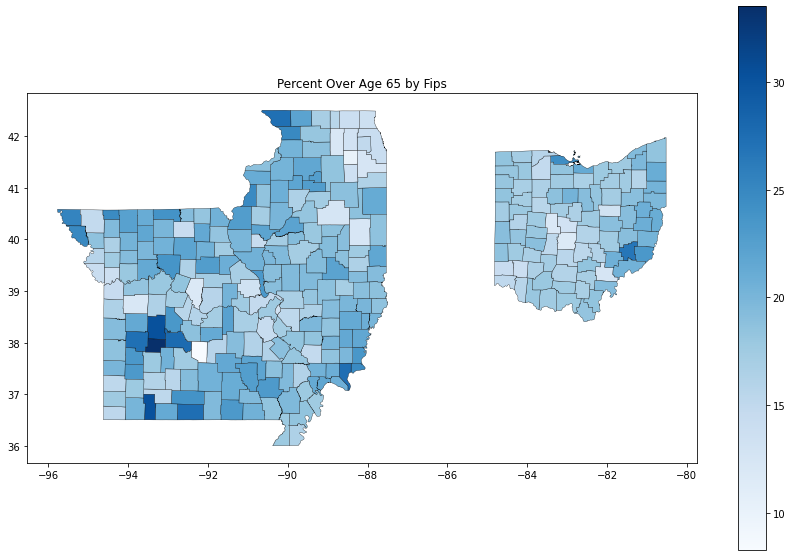

In [18]:
map2 = full[["p_age_65over", "fips", "geometry"]].drop_duplicates().reset_index(drop=True)
map2 = gpd.GeoDataFrame(map2)

fig,ax = plt.subplots(figsize=(15,10))
map2.plot(ax=ax,
           column= "p_age_65over",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           cmap="Blues")
plt.title("Percent Over Age 65 by Fips")

In [19]:
full.columns

Index(['state', 'fips', 'county', 'date', 'cumulative_cases',
       'cumulative_deaths', 'new_cases', 'new_deaths', 'new_cases_7avg',
       'new_deaths_7avg', '2weeksago_cases_7avg', '2weeksago_deaths_7avg',
       'total_pop', 'male', 'perc_male', 'female', 'perc_female', 'age_15_19',
       'p_age_15_19', 'age_20_24', 'p_age_20_24', 'age_25_34', 'p_age_25_34',
       'age_35_44', 'p_age_35_44', 'age_45_54', 'p_age_45_54', 'age_55_59',
       'p_age_55_59', 'age_60_64', 'p_age_60_64', 'age_median', 'age_62over',
       'p_age_62over', 'age_65over', 'p_age_65over', 'white', 'p_white',
       'black', 'p_black', 'native', 'p_native', 'asian', 'p_asian',
       'hawaiian', 'p_hawaiian', 'other_race', 'p_other_race', 'hispanic',
       'p_hispanic', 'housing_units', 'below_50_pov', 'below_125_pov',
       'below_150_pov', 'below_185_pov', 'below_200_pov', 'below_300_pov',
       'below_400_pov', 'below_500_pov', 'below_pov', 'male_below_pov',
       'female_below_pov', 'age_under14', 'p

In [20]:
state = full.groupby(["date", "state"]) \
    ["new_cases_7avg", "new_deaths", "total_adult_hospitalizations", "new doses", "total_pop"].sum().unstack()
state = state[state.index > "2020-07-31"]
state

<ipython-input-20-debd8cd4d608>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state = full.groupby(["date", "state"]) \


new_cases_7avg                 new_deaths              \
state                  IL      MO      OH         IL    MO    OH   
date                                                               
2020-08-01         1512.0  1393.0  1272.0        4.0   6.0  26.0   
2020-08-02         1506.0  1307.0  1291.0       11.0   0.0  16.5   
2020-08-03         1541.0  1280.0  1260.0       10.0   5.0  10.0   
2020-08-04         1572.0  1245.0  1234.0       19.0  14.0  32.5   
2020-08-05         1640.0  1193.0  1205.0       30.0   8.5  29.0   
...                   ...     ...     ...        ...   ...   ...   
2021-05-23         1330.0   521.0   917.0       24.0   0.0   0.0   
2021-05-24         1322.0   517.0   895.0       13.0   6.0   0.0   
2021-05-25         1241.0   513.0   855.0       17.0  53.0  45.0   
2021-05-26         1169.0   522.0   865.0       26.0  38.0   0.0   
2021-05-27         1068.0   542.0   796.0       42.0  16.0   0.0   

           total_adult_hospitalizations                 new doses           \
state                                IL      MO      OH        IL       MO   
date                                                                         
2020-08-01                       5241.0  4162.0  7072.0       0.0      0.0   
2020-08-02                       5241.0  4162.0  7072.0       0.0      0.0   
2020-08-03                       5241.0  4162.0  7072.0       0.0      0.0   
2020-08-04                       5241.0  4162.0  7072.0       0.0      0.0   
2020-08-05                       5241.0  4162.0  7072.0       0.0      0.0   
...                                 ...     ...     ...       ...      ...   
2021-05-23                          0.0     0.0     0.0   26723.0   3928.0   
2021-05-24                          0.0     0.0     0.0   36303.0  12122.0   
2021-05-25                          0.0     0.0     0.0   43378.0  12477.0   
2021-05-26                          0.0     0.0     0.0   46704.0  11723.0   
2021-05-27                          0.0     0.0     0.0   46009.0   5014.0   

                      total_pop                         
state            OH          IL         MO          OH  
date                                                    
2020-08-01      0.0  12770631.0  6104910.0  11655397.0  
2020-08-02      0.0  12770631.0  6104910.0  11655397.0  
2020-08-03      0.0  12770631.0  6104910.0  11655397.0  
2020-08-04      0.0  12770631.0  6104910.0  11655397.0  
2020-08-05      0.0  12770631.0  6104910.0  11655397.0  
...             ...         ...        ...         ...  
2021-05-23  13023.0  12770631.0  6921046.0  11655397.0  
2021-05-24  30881.0  12770631.0  6921046.0  11655397.0  
2021-05-25  34954.0  12770631.0  6921046.0  11655397.0  
2021-05-26  32240.0  12770631.0  6921046.0  11655397.0  
2021-05-27  30876.0  12770631.0  6921046.0  11655397.0  

[300 rows x 15 columns]

In [21]:
state.columns = [' '.join(col).strip() for col in state.columns.values]
state["total_adult_hospitalizations IL"] = state["total_adult_hospitalizations IL"]/7
state["total_adult_hospitalizations MO"] = state["total_adult_hospitalizations MO"]/7
state["total_adult_hospitalizations OH"] = state["total_adult_hospitalizations OH"]/7

In [22]:
IL = state[["new_cases_7avg IL", "new_deaths IL", 'total_adult_hospitalizations IL', 'new doses IL', 'total_pop IL']]
MO = state[["new_cases_7avg MO", "new_deaths MO", 'total_adult_hospitalizations MO', 'new doses MO', 'total_pop MO']]
OH = state[["new_cases_7avg OH", "new_deaths OH", 'total_adult_hospitalizations OH', 'new doses OH', 'total_pop OH']]

IL.columns = ["Covid Cases - 7 day average", "Daily Deaths", 'Total Adult Hospitalizations', \
              'Daily Vaccines Administered', 'Total Population']
MO.columns = ["Covid Cases - 7 day average", "Daily Deaths", 'Total Adult Hospitalizations', \
              'Daily Vaccines Administered', 'Total Population']
OH.columns = ["Covid Cases - 7 day average", "Daily Deaths", 'Total Adult Hospitalizations', \
              'Daily Vaccines Administered', 'Total Population']

Text(0.5, 1.0, 'Illinois Covid Data')

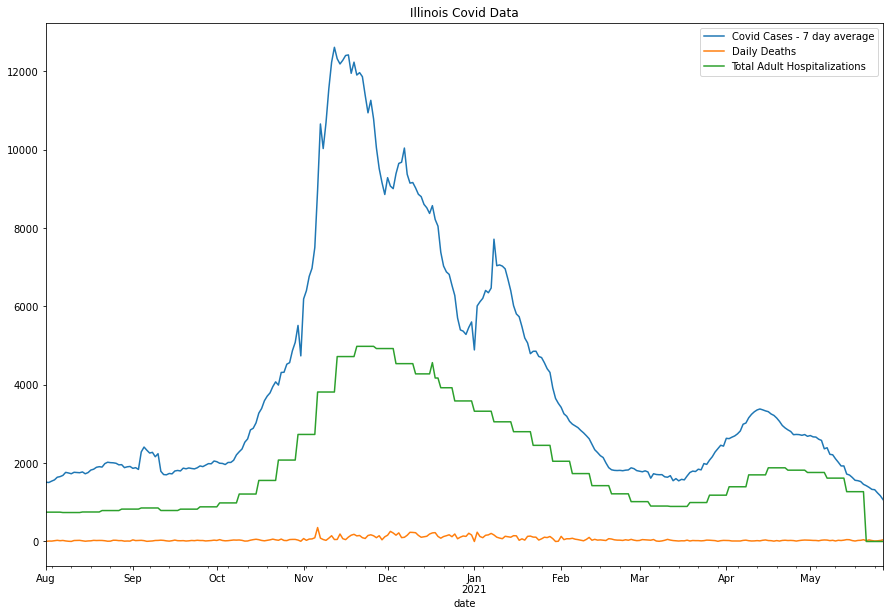

In [23]:
fig,ax = plt.subplots(figsize=(15,10))

ploty = IL.plot(y="Covid Cases - 7 day average", use_index=True, ax=ax)
ploty = IL.plot(y="Daily Deaths", use_index=True, ax=ax)
IL.plot(y="Total Adult Hospitalizations", use_index=True, ax=ax)
plt.title("Illinois Covid Data")

Text(0.5, 1.0, 'Missouri Covid Data')

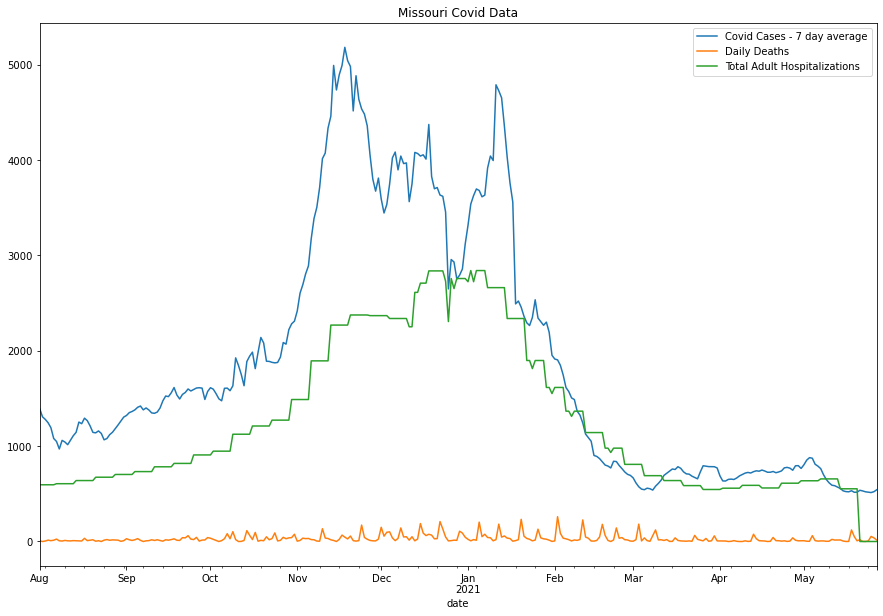

In [24]:
fig,ax = plt.subplots(figsize=(15,10))

plotMO = MO.plot(y="Covid Cases - 7 day average", use_index=True, ax=ax)
plotMO = MO.plot(y="Daily Deaths", use_index=True, ax=ax)
plotMO = MO.plot(y="Total Adult Hospitalizations", use_index=True, ax=ax)
plt.title("Missouri Covid Data")

Text(0.5, 1.0, 'Ohio Covid Data')

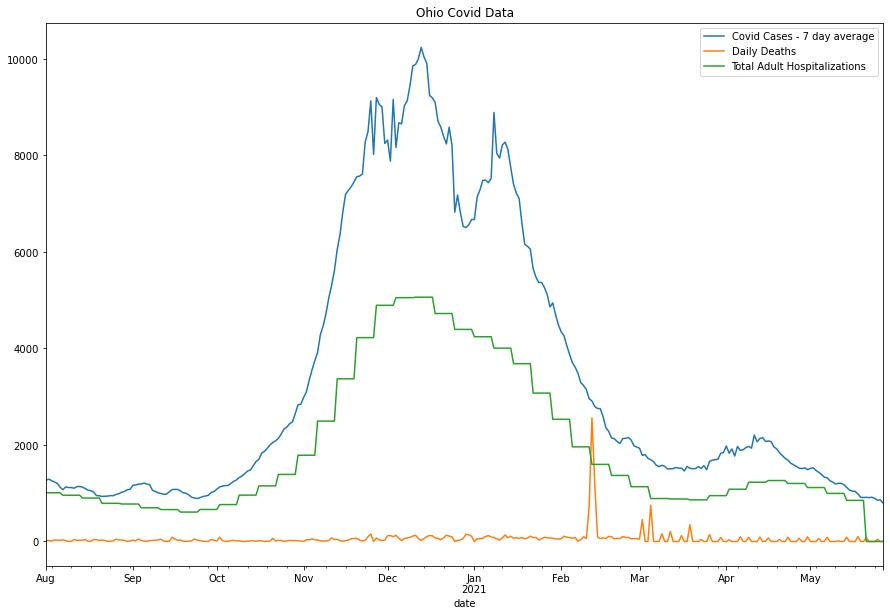

In [25]:
fig,ax = plt.subplots(figsize=(15,10))

plotOH = OH.plot(y="Covid Cases - 7 day average", use_index=True, ax=ax)
plotOH = OH.plot(y="Daily Deaths", use_index=True, ax=ax)
plotOH = OH.plot(y="Total Adult Hospitalizations", use_index=True, ax=ax)
plt.title("Ohio Covid Data")

In [26]:
output = pd.read_csv("../model_outputs/Final Week Predictions.csv", dtype={'fips': str})
output.dtypes

Unnamed: 0      int64
state          object
county         object
fips           object
predicted     float64
date           object
new_cases     float64
residual      float64
total_pop       int64
dtype: object

In [27]:
final = output.merge(df, on="fips", how="inner")
final.loc[final["new_cases"] < 0, "new_cases"] = 0

Text(0.5, 1.0, 'Predicted Cases for 5/28/2021 by County')

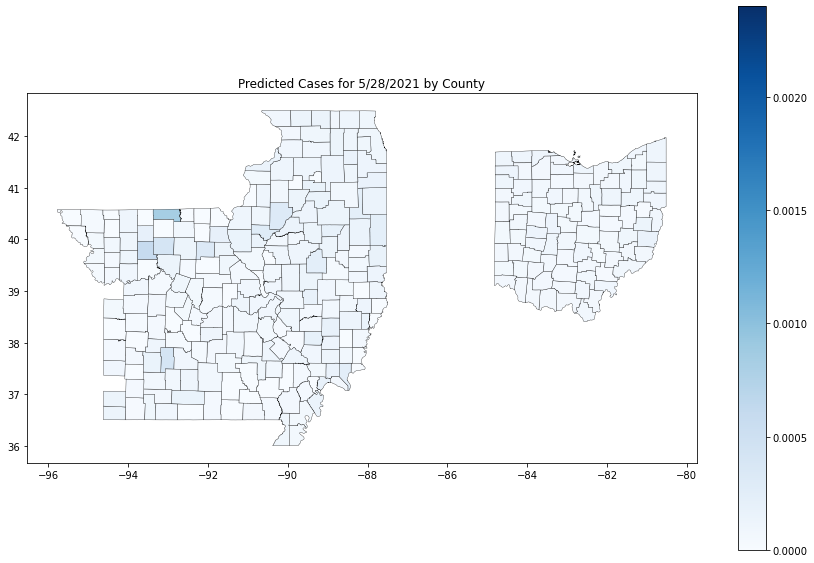

In [28]:
final = final[final["date"] == "2021-05-28"]
final["predicted_per_pop"] = final["predicted"]/final["total_pop"]
map_full = final[["predicted_per_pop", "fips", "geometry"]]
map_full = gpd.GeoDataFrame(map_full)

fig,ax = plt.subplots(figsize=(15,10))
map_full.plot(ax=ax,
           column= "predicted_per_pop",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           vmax = 0.0024,
           cmap="Blues")
plt.title("Predicted Cases for 5/28/2021 by County")

# leg = ax.get_legend()
# leg.get_texts()[0].set_text('0.00-0.003')

Text(0.5, 1.0, 'Actual Cases for 5/28/2021 by County')

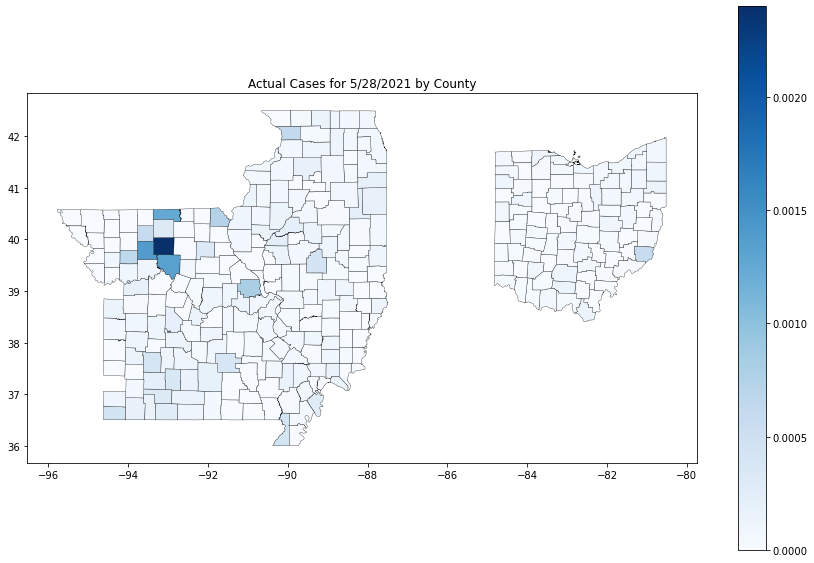

In [29]:
final = final[final["date"] == "2021-05-28"]
final["actual_per_pop"] = final["new_cases"]/final["total_pop"]
map_full_act = final[["actual_per_pop", "fips", "geometry"]]
map_full_act = gpd.GeoDataFrame(map_full_act)

fig,ax = plt.subplots(figsize=(15,10))
map_full_act.plot(ax=ax,
           column= "actual_per_pop",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           vmax = 0.0024,
           cmap="Blues")
plt.title("Actual Cases for 5/28/2021 by County")

In [30]:
final

,Unnamed: 0,state,county,fips,predicted,date,new_cases,residual,total_pop,geometry,predicted_per_pop,actual_per_pop
0,0,IL,Adams,17001,10.0,2021-05-28,4.0,-6.0,66085,"POLYGON ((-91.50534 40.20028, -91.49184 40.200...",0.000151,0.000061
7,7,IL,Alexander,17003,0.0,2021-05-28,0.0,0.0,6260,"POLYGON ((-89.48603 37.33453, -89.47082 37.334...",0.000000,0.000000
14,14,IL,Bond,17005,3.0,2021-05-28,1.0,-2.0,16589,"POLYGON ((-89.25026 39.02822, -89.25025 39.013...",0.000181,0.000060
21,21,IL,Boone,17007,5.0,2021-05-28,5.0,0.0,53537,"POLYGON ((-88.70742 42.49351, -88.70740 42.493...",0.000093,0.000093
28,28,IL,Brown,17009,1.0,2021-05-28,0.0,-1.0,6628,"POLYGON ((-90.62494 40.02607, -90.62491 40.026...",0.000151,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2100,2100,OH,Washington,39167,5.0,2021-05-28,2.0,-3.0,60426,"POLYGON ((-81.47353 39.58334, -81.47345 39.586...",0.000083,0.000033
2107,2107,OH,Wayne,39169,14.0,2021-05-28,7.0,-7.0,116099,"POLYGON ((-81.99531 40.66798, -81.99582 40.667...",0.000121,0.000060
2114,2114,OH,Williams,39171,4.0,2021-05-28,2.0,-2.0,36816,"POLYGON ((-84.47629 41.70377, -84.45740 41.704...",0.000109,0.000054
2121,2121,OH,Wood,39173,9.0,2021-05-28,4.0,-5.0,130150,"POLYGON ((-83.70990 41.52184, -83.70986 41.522...",0.000069,0.000031


In [31]:
output.loc[output["new_cases"] < 0, "new_cases"] = 0
output_week = output.groupby(["fips"]).agg({"new_cases": [sum],"predicted":[sum], "total_pop":[np.mean]})
final1 = output_week.merge(df, on="fips", how="inner")
final1.columns = ["fips", "new_cases", "predicted", "total_pop", "geometry"]
final1

/Users/sophiamlawer/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,fips,new_cases,predicted,total_pop,geometry
0,17001,19.0,67.0,66085,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
1,17003,0.0,0.0,6260,"POLYGON ((-89.48603 37.33453, -89.47082 37.334..."
2,17005,2.0,16.0,16589,"POLYGON ((-89.25026 39.02822, -89.25025 39.013..."
3,17007,16.0,39.0,53537,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
4,17009,1.0,8.0,6628,"POLYGON ((-90.62494 40.02607, -90.62491 40.026..."
...,...,...,...,...,...
300,39167,10.0,33.0,60426,"POLYGON ((-81.47353 39.58334, -81.47345 39.586..."
301,39169,22.0,91.0,116099,"POLYGON ((-81.99531 40.66798, -81.99582 40.667..."
302,39171,8.0,24.0,36816,"POLYGON ((-84.47629 41.70377, -84.45740 41.704..."
303,39173,9.0,60.0,130150,"POLYGON ((-83.70990 41.52184, -83.70986 41.522..."


Text(0.5, 1.0, 'Predicted Cases for Week Beginning 5/28/2021 by County')

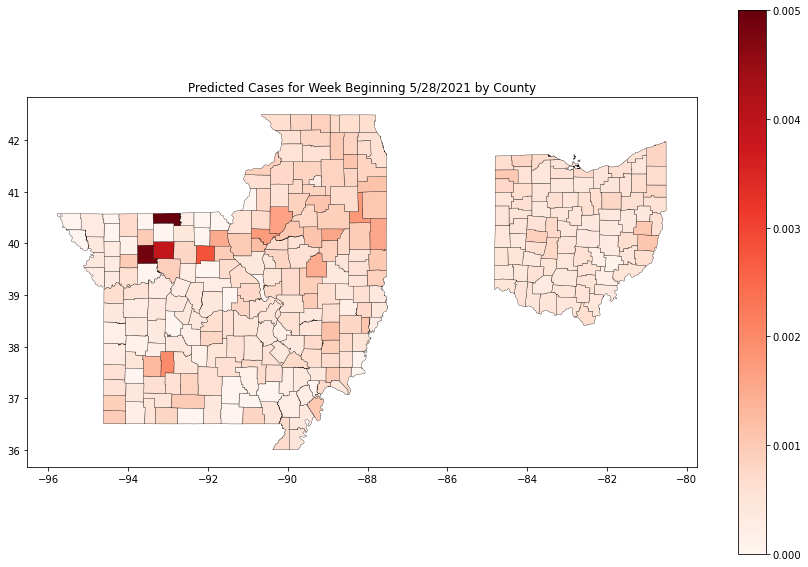

In [59]:
# final = final[final["date"] == "2021-05-28"]
final1["predicted_per_pop"] = final1["predicted"]/final1["total_pop"]
map_week = final1[["predicted_per_pop", "fips", "geometry"]]
map_week = gpd.GeoDataFrame(map_week)

fig,ax = plt.subplots(figsize=(15,10))
map_week.plot(ax=ax,
           column= "predicted_per_pop",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           vmax = 0.005,
           cmap="Reds")
plt.title("Predicted Cases for Week Beginning 5/28/2021 by County")

Text(0.5, 1.0, 'Actual Cases for Week Beginning 5/28/2021 by County')

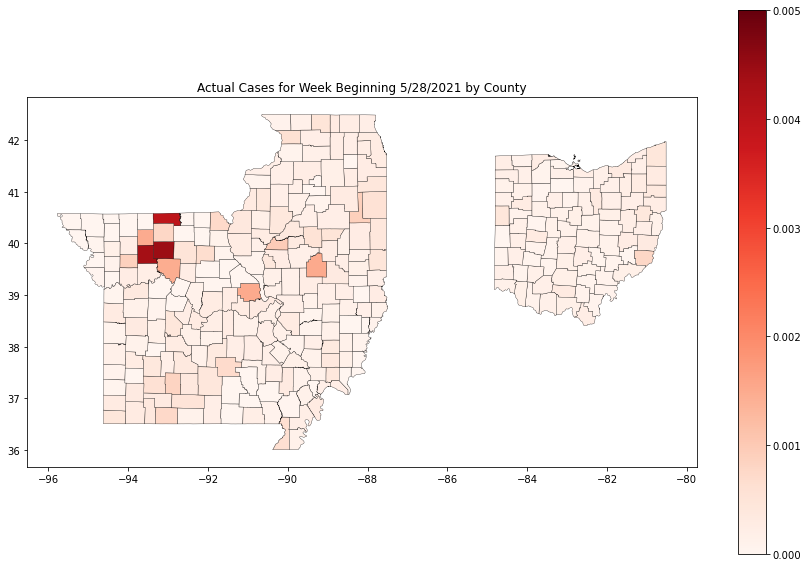

In [57]:
final1["actual_per_pop"] = final1["new_cases"]/final1["total_pop"]
map_week_act = final1[["actual_per_pop", "fips", "geometry"]]
map_week_act = gpd.GeoDataFrame(map_week_act)

fig,ax = plt.subplots(figsize=(15,10))
map_week_act.plot(ax=ax,
           column= "actual_per_pop",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           vmax = 0.005,
           cmap="Reds")
plt.title("Actual Cases for Week Beginning 5/28/2021 by County")

In [45]:
peak = pd.read_csv("../model_outputs/peak_week_predictions.csv", dtype={'fips': str})
peak

,Unnamed: 0,state,county,fips,predicted,date,new_cases_7avg_x,new_cases_7avg_y,total_pop
0,149,IL,Adams,17001,108.07,2021-01-03,118.0,118.0,66085.0
1,150,IL,Adams,17001,112.04,2021-01-04,137.0,137.0,66085.0
2,151,IL,Adams,17001,83.54,2021-01-05,120.0,120.0,66085.0
3,152,IL,Adams,17001,75.08,2021-01-06,104.0,104.0,66085.0
4,153,IL,Adams,17001,81.78,2021-01-07,87.0,87.0,66085.0
...,...,...,...,...,...,...,...,...,...
2217,93847,OH,Wyandot,39175,20.89,2021-01-05,22.0,22.0,22000.0
2218,93848,OH,Wyandot,39175,21.03,2021-01-06,19.0,19.0,22000.0
2219,93849,OH,Wyandot,39175,19.51,2021-01-07,20.0,20.0,22000.0
2220,93850,OH,Wyandot,39175,22.27,2021-01-08,24.0,24.0,22000.0


In [38]:
peak_out = peak.merge(df, on="fips", how="inner")
peak_out.loc[peak_out["new_cases_7avg_x"] < 0, "new_cases_7avg_x"] = 0

Text(0.5, 1.0, 'Predicted Cases for 01/08/2021 by County')

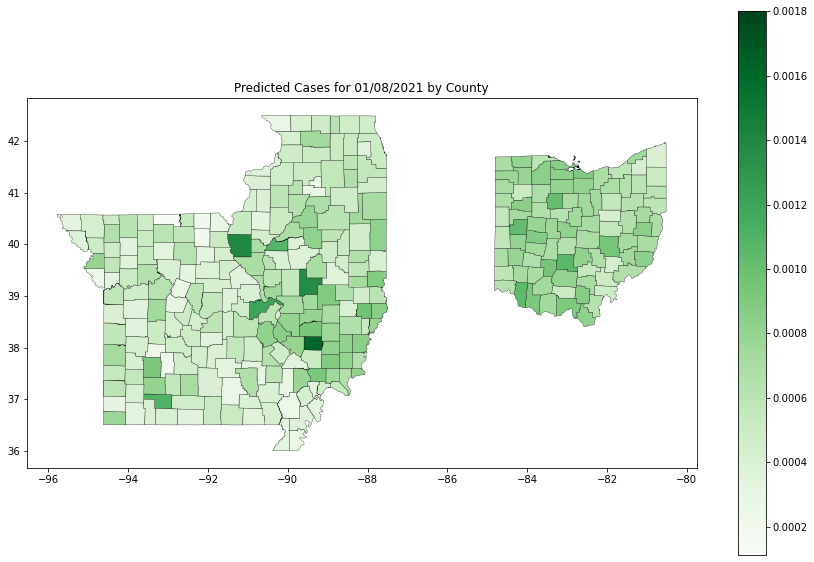

In [49]:
peak_out = peak_out[peak_out["date"] == "2021-01-08"]
peak_out["predicted_per_pop"] = peak_out["predicted"]/peak_out["total_pop"]
peak_map = peak_out[["predicted_per_pop", "fips", "geometry"]]
peak_map = gpd.GeoDataFrame(peak_map)

fig,ax = plt.subplots(figsize=(15,10))
peak_map.plot(ax=ax,
           column= "predicted_per_pop",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           vmax = 0.0018,
           cmap="Greens")
plt.title("Predicted Cases for 01/08/2021 by County")

Text(0.5, 1.0, 'Actual Cases for 01/08/2021 by County')

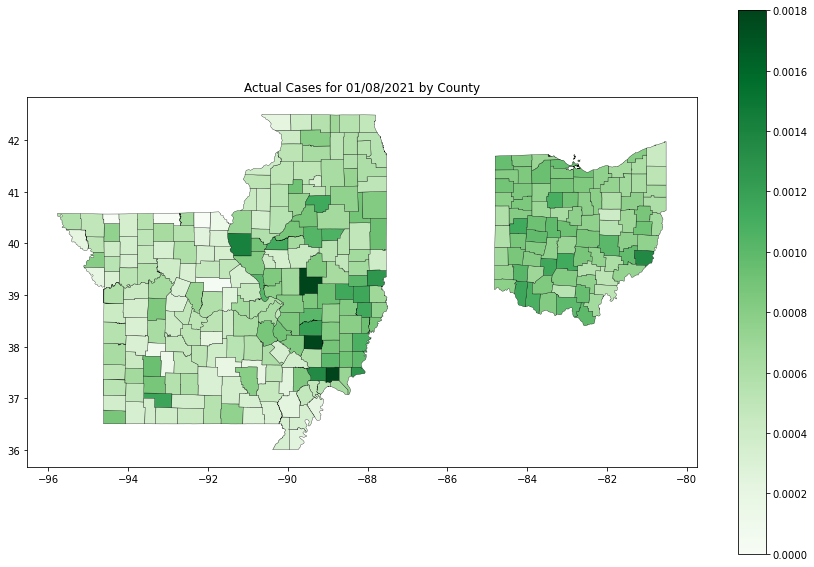

In [47]:
peak_out = peak_out[peak_out["date"] == "2021-01-08"]
peak_out["actual_per_pop"] = peak_out["new_cases_7avg_x"]/peak_out["total_pop"]
peak_map = peak_out[["actual_per_pop", "fips", "geometry"]]
peak_map = gpd.GeoDataFrame(peak_map)

fig,ax = plt.subplots(figsize=(15,10))
peak_map.plot(ax=ax,
           column= "actual_per_pop",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           vmax = 0.0018,
           cmap="Greens")
plt.title("Actual Cases for 01/08/2021 by County")

Week Overall:

In [46]:
peak.loc[peak["new_cases_7avg_x"] < 0, "new_cases_7avg_x"] = 0
peak_output_week = peak.groupby(["fips"]).agg({"new_cases_7avg_x": [sum],"predicted":[sum], "total_pop":[np.mean]})
final_peak = peak_output_week.merge(df, on="fips", how="inner")
final_peak.columns = ["fips", "new_cases", "predicted", "total_pop", "geometry"]
final_peak

/Users/sophiamlawer/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,fips,new_cases,predicted,total_pop,geometry
0,17001,753.0,641.050000,66085.0,"POLYGON ((-91.50534 40.20028, -91.49184 40.200..."
1,17003,18.0,17.110000,6260.0,"POLYGON ((-89.48603 37.33453, -89.47082 37.334..."
2,17005,80.0,77.090000,16589.0,"POLYGON ((-89.25026 39.02822, -89.25025 39.013..."
3,17007,217.0,211.030000,53537.0,"POLYGON ((-88.70742 42.49351, -88.70740 42.493..."
4,17009,41.0,36.780000,6628.0,"POLYGON ((-90.62494 40.02607, -90.62491 40.026..."
...,...,...,...,...,...
300,39167,281.0,276.480000,60426.0,"POLYGON ((-81.47353 39.58334, -81.47345 39.586..."
301,39169,422.0,403.438333,116099.0,"POLYGON ((-81.99531 40.66798, -81.99582 40.667..."
302,39171,198.0,181.020000,36816.0,"POLYGON ((-84.47629 41.70377, -84.45740 41.704..."
303,39173,754.0,698.430000,130150.0,"POLYGON ((-83.70990 41.52184, -83.70986 41.522..."


Text(0.5, 1.0, 'Predicted Cases for Week of 01/08/2021 by County')

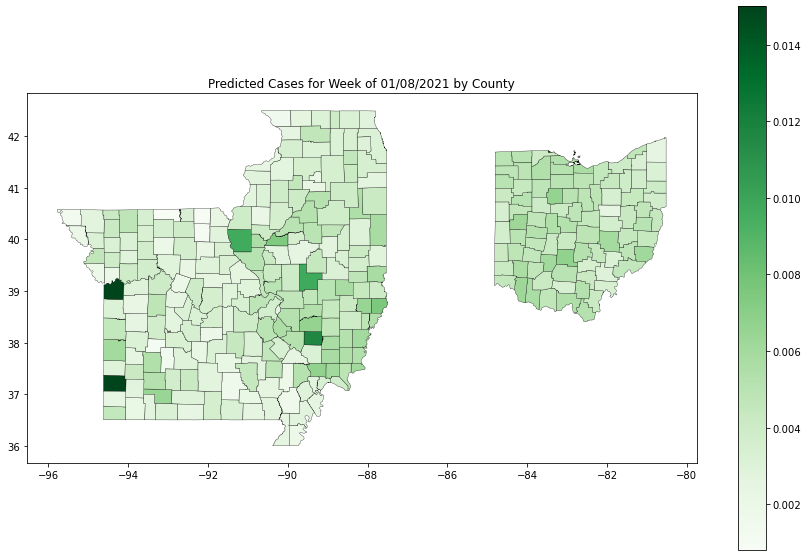

In [55]:
final_peak["predicted_per_pop"] = final_peak["predicted"]/final_peak["total_pop"]
peak_week_map = final_peak[["predicted_per_pop", "fips", "geometry"]]
peak_week_map = gpd.GeoDataFrame(peak_week_map)

fig,ax = plt.subplots(figsize=(15,10))
peak_week_map.plot(ax=ax,
           column= "predicted_per_pop",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           vmax = 0.015,
           cmap="Greens")
plt.title("Predicted Cases for Week of 01/08/2021 by County")

Text(0.5, 1.0, 'Actual Cases for Week of 01/08/2021 by County')

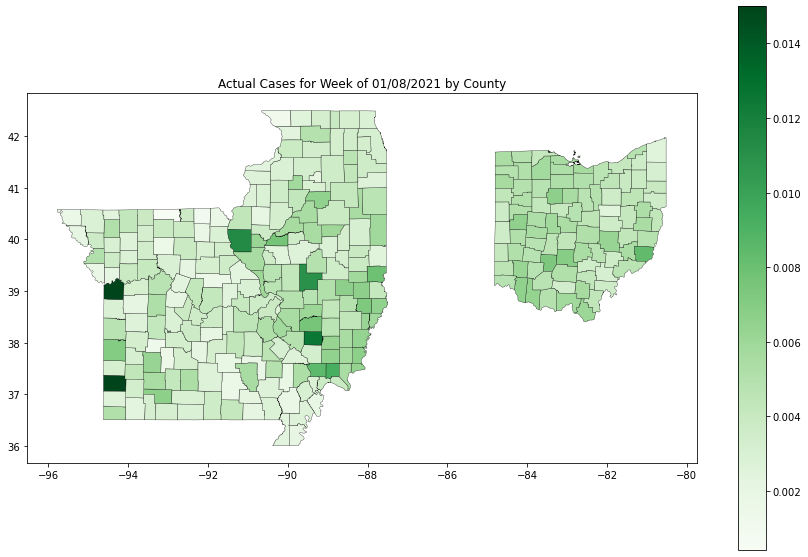

In [54]:
#final_peak = final_peak[peak_out["date"] == "2021-01-08"]
final_peak["actual_per_pop"] = final_peak["new_cases"]/final_peak["total_pop"]
peak_week_map_act = final_peak[["actual_per_pop", "fips", "geometry"]]
peak_week_map_act = gpd.GeoDataFrame(peak_week_map_act)

fig,ax = plt.subplots(figsize=(15,10))
peak_week_map_act.plot(ax=ax,
           column= "actual_per_pop",
           legend=True,
           edgecolor='black',
           linewidth=0.3,
           vmax = 0.015,
           cmap="Greens")
plt.title("Actual Cases for Week of 01/08/2021 by County")